# Ejemplo 1

In [ ]:
import numpy as np
from scipy.optimize import minimize

# Función objetivo (negativa porque minimize minimiza)
def impacto_negativo(x):
    g, i = x
    return - (100 * (1 - np.exp(-0.05 * g)) + 80 * (1 - np.exp(-0.08 * i)))

# Restricción: g + i ≤ 10000 → 10000 - (g + i) ≥ 0
def restriccion_total(x):
    return 10000 - (x[0] + x[1])

# Definir la única restricción
cond = {'type': 'ineq', 'fun': restriccion_total}

# Límites: Google ≥ 2000, Instagram ≥ 1000
bounds = [(2000, None), (1000, None)]

# Valor inicial
x0 = [2000, 1000]

# Resolver el problema
res = minimize(impacto_negativo, x0, method='SLSQP', bounds=bounds, constraints=cond)

# Mostrar resultado
if res.success:
    g, i = res.x
    print(f"Google Ads: ${g:.2f}")
    print(f"Instagram Ads: ${i:.2f}")
    print(f"Impacto total: {-res.fun:.2f}")
else:
    print("Error:", res.message)


Google Ads: $2000.00
Instagram Ads: $1000.00
Impacto total: 180.00


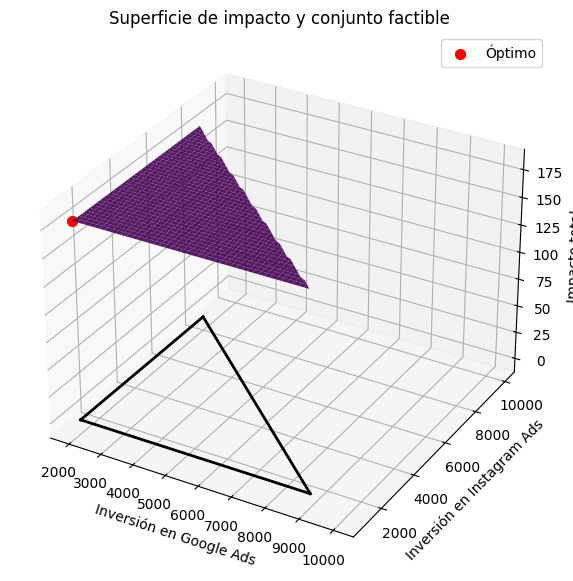

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Función de impacto
def impacto(x):
    g, i = x
    return 100 * (1 - np.exp(-0.05 * g)) + 80 * (1 - np.exp(-0.08 * i))

def impacto_negativo(x):
    return -impacto(x)

# Restricción presupuestaria
def restriccion_total(x):
    return 10000 - (x[0] + x[1])

# Configurar restricciones y bounds
cond = {'type': 'ineq', 'fun': restriccion_total}
bounds = [(2000, None), (1000, None)]
x0 = [2000, 1000]

# Resolver
res = minimize(impacto_negativo, x0, method='SLSQP', bounds=bounds, constraints=cond)

# Grilla
g_vals = np.linspace(2000, 10000, 100)
i_vals = np.linspace(1000, 10000, 100)
G, I = np.meshgrid(g_vals, i_vals)

# Evaluar solo dentro del conjunto factible
factible = (G + I <= 10000)
Z = np.full_like(G, np.nan)
for i in range(G.shape[0]):
    for j in range(G.shape[1]):
        if factible[i, j]:
            Z[i, j] = impacto([G[i, j], I[i, j]])

# Gráfico
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(G, I, Z, cmap='viridis', alpha=0.9)

# Borde 1: x1 = 2000 (vertical), entre x2 = 1000 y x2 = 8000
x1_borde = 2000
x2_range = np.linspace(1000, 8000, 100)
ax.plot(
    [x1_borde]*len(x2_range), x2_range, [0]*len(x2_range),
    color='black', linewidth=2
)

# Borde 2: x2 = 1000 (horizontal), entre x1 = 2000 y x1 = 9000
x2_borde = 1000
x1_range = np.linspace(2000, 9000, 100)
ax.plot(
    x1_range, [x2_borde]*len(x1_range), [0]*len(x1_range),
    color='black', linewidth=2
)

# Borde 3: x1 + x2 = 10000 → x2 = 10000 - x1
x1_diag = np.linspace(2000, 9000, 100)
x2_diag = 10000 - x1_diag
ax.plot(
    x1_diag, x2_diag, [0]*len(x1_diag),
    color='black', linewidth=2
)

# Punto óptimo
if res.success:
    g_opt, i_opt = res.x
    z_opt = impacto([g_opt, i_opt])
    ax.scatter(g_opt, i_opt, z_opt, color='red', s=50, label="Óptimo")

# Etiquetas
ax.set_xlabel("Inversión en Google Ads")
ax.set_ylabel("Inversión en Instagram Ads")
ax.set_zlabel("Impacto total")
ax.set_title("Superficie de impacto y conjunto factible")
ax.legend()

plt.show()


# Ejemplo 2

In [ ]:
import numpy as np
from scipy.optimize import minimize

# Función objetivo (negativa para maximizar)
def ganancia_negativa(x):
    x1, x2 = x
    return -(40 * x1 + 30 * x2)

# Restricción 1: x1^2 + x2^2 ≤ 2500
def restriccion_maquina(x):
    return 2500 - (x[0]**2 + x[1]**2)

# Restricción 2: x1 / (x2 + 1) ≤ 4 → 4(x2 + 1) - x1 ≥ 0
def restriccion_compatibilidad(x):
    return 4 * (x[1] + 1) - x[0]

# Lista de restricciones
restricciones = [
    {'type': 'ineq', 'fun': restriccion_maquina},
    {'type': 'ineq', 'fun': restriccion_compatibilidad}
]

# Límites (x1, x2 ≥ 0)
bounds = [(0, None), (0, None)]

# Valor inicial factible
x0 = [1, 1]

# Optimización
res = minimize(ganancia_negativa, x0, method='SLSQP', bounds=bounds, constraints=restricciones)

# Mostrar resultado
if res.success:
    x1_opt, x2_opt = res.x
    ganancia_max = -res.fun
    print(f"Producción óptima de A: {x1_opt:.2f} unidades")
    print(f"Producción óptima de B: {x2_opt:.2f} unidades")
    print(f"Ganancia máxima: ${ganancia_max:.2f}")
else:
    print("Error:", res.message)


Producción óptima de A: 40.00 unidades
Producción óptima de B: 30.00 unidades
Ganancia máxima: $2500.00


# Ejemplo 3

In [ ]:
import numpy as np
from scipy.optimize import minimize

# Función objetivo: costo a minimizar
def costo(x):
    x1, x2 = x
    return np.sin(x1) * np.cos(x2) + 0.1 * (x1 + x2) + 25


# Restricciones lineales
restricciones = [
    {'type': 'ineq', 'fun': lambda x: x[0] + x[1] - 2},         # x1 + x2 ≥ 2
    {'type': 'ineq', 'fun': lambda x: 8 - (x[0] + 2 * x[1])},   # x1 + 2x2 ≤ 8
]

# Límites (bounds)
bounds = [(0, 6), (0, 6)]

# Probar múltiples semillas
np.random.seed(42)
resultados = []

for i in range(10):
    x0 = np.random.uniform(0, 6, size=2)  # semilla aleatoria
    res = minimize(costo, x0, method='SLSQP', bounds=bounds, constraints=restricciones)
    if res.success:
        resultados.append((res.fun, res.x))

# Ordenar por valor de la función objetivo
resultados.sort()

# Mostrar la mejor solución encontrada
mejor_valor, mejor_x = resultados[0]
print(f"Mejor solución encontrada:")
print(f"x1 = {mejor_x[0]:.4f}, x2 = {mejor_x[1]:.4f}")
print(f"Costo mínimo estimado: {mejor_valor:.4f}")


Mejor solución encontrada:
x1 = 1.4701, x2 = 3.0409
Costo mínimo estimado: 24.4612
